In [2]:
import pandas as pd

df=pd.read_csv('lending_data.csv')
df.shape

(77536, 8)

In [3]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


# Check for missing values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


# Visualizations

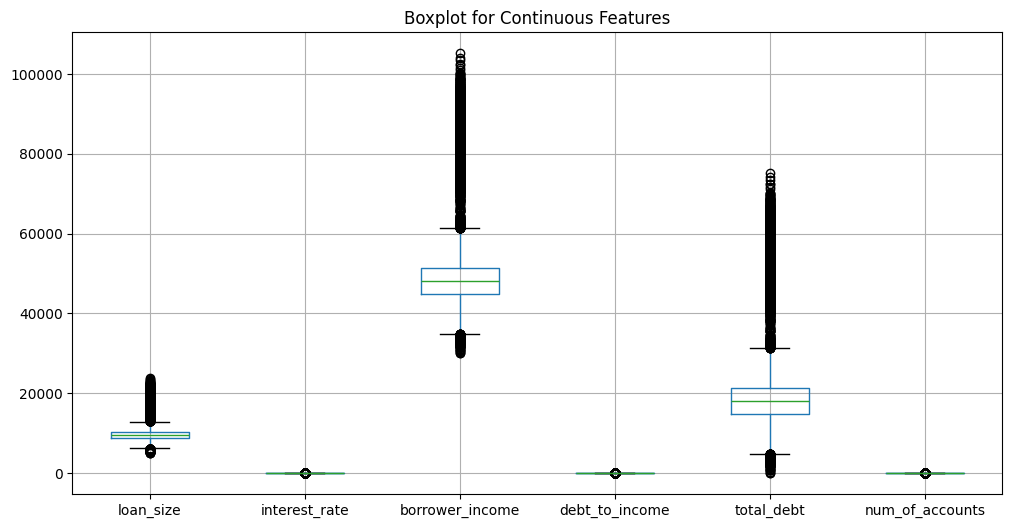

In [6]:
# Boxplots to visualize potential outliers
from matplotlib import pyplot as plt

continuous_features = ['loan_size', 'interest_rate', 'borrower_income',
                       'debt_to_income', 'total_debt','num_of_accounts']
plt.figure(figsize=(12, 6))
df[continuous_features].boxplot()
plt.title("Boxplot for Continuous Features")
plt.show()

Frequency Table for Class distribution
loan_status
1     2500
0    75036
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

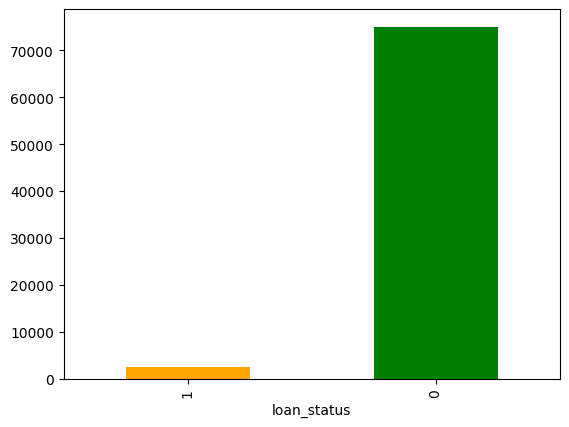

In [7]:
# change position
classDist = df['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar',color=['orange', 'green'])

<ipython-input-8-2cfb8d2a11c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_size', data=df, palette='Set2')


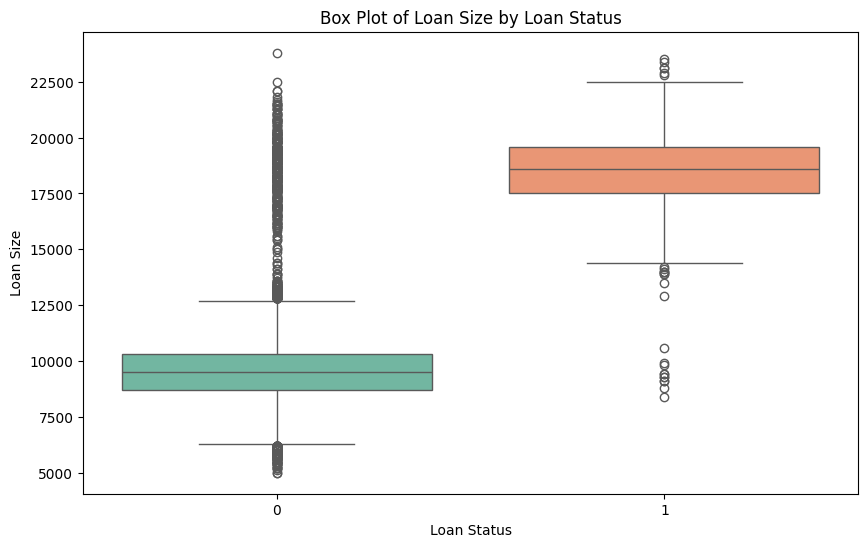

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_size', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Size')
plt.title('Box Plot of Loan Size by Loan Status')

# Show the plot
plt.show()


<ipython-input-9-4f8032eec8e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='borrower_income', data=df, palette='Set3')


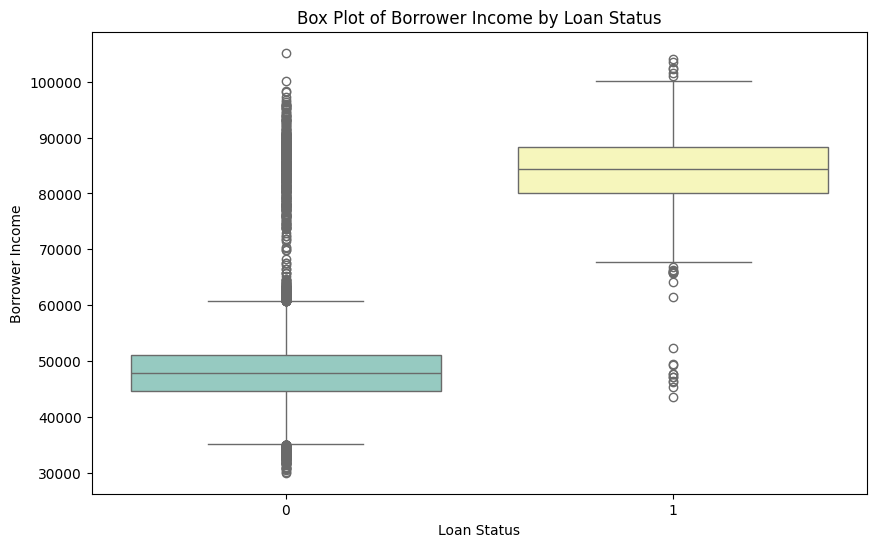

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='borrower_income', data=df, palette='Set3')

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Borrower Income')
plt.title('Box Plot of Borrower Income by Loan Status')

# Show the plot
plt.show()


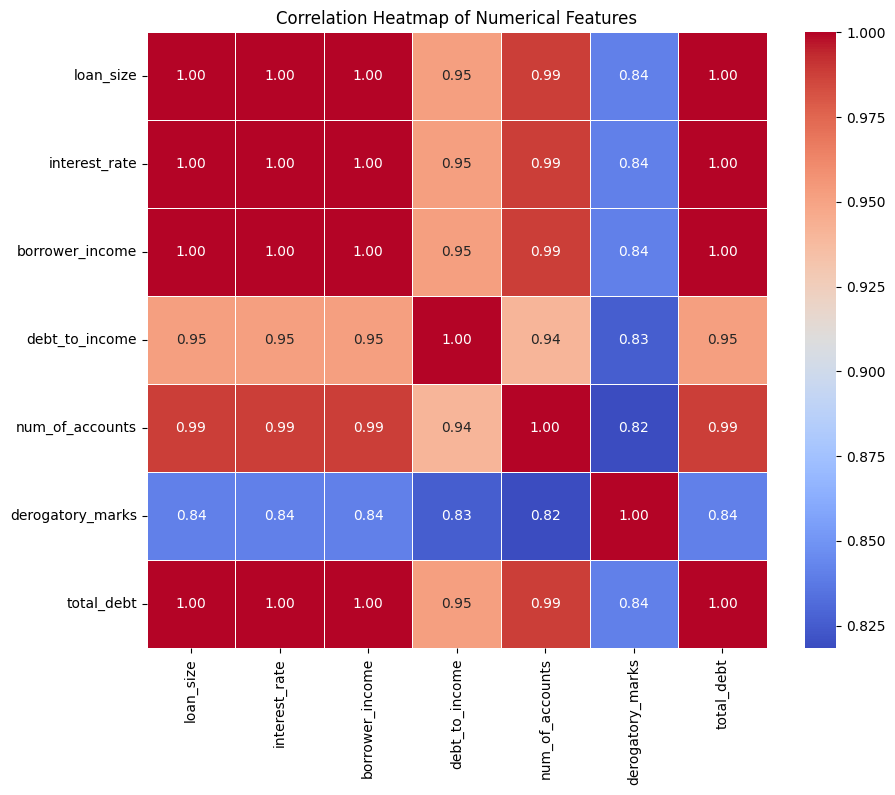

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset and it contains numerical columns
# First, calculate the correlation matrix
correlation_matrix = df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add title
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [11]:
duplicates = df.duplicated()
print(duplicates)  # True for duplicates, False for unique rows


0        False
1        False
2        False
3        False
4        False
         ...  
77531    False
77532     True
77533     True
77534    False
77535     True
Length: 77536, dtype: bool


# Feature Extraction

In [12]:
import pandas as pd

# Assuming `df` is your dataset
def categorize_dti(dti):
    if dti < 0.36:
        return 'Low'
    elif 0.36 <= dti <= 0.50:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['dti_risk_category'] = df['debt_to_income'].apply(categorize_dti)

# Display the first few rows to verify
#print(df[['debt_to_income', 'dti_risk_category']].head())
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status,dti_risk_category
0,10700.0,7.672,52800,0.431818,5,1,22800,0,Medium
1,8400.0,6.692,43600,0.311927,3,0,13600,0,Low
2,9000.0,6.963,46100,0.349241,3,0,16100,0,Low
3,10700.0,7.664,52700,0.430740,5,1,22700,0,Medium
4,10800.0,7.698,53000,0.433962,5,1,23000,0,Medium
...,...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1,High
77532,17700.0,10.662,80900,0.629172,11,2,50900,1,High
77533,17600.0,10.595,80300,0.626401,11,2,50300,1,High
77534,16300.0,10.068,75300,0.601594,10,2,45300,1,High


Frequency Table for DTI Category
dti_risk_category
Medium    43210
Low       31076
High       3250
Name: count, dtype: int64


<Axes: xlabel='dti_risk_category'>

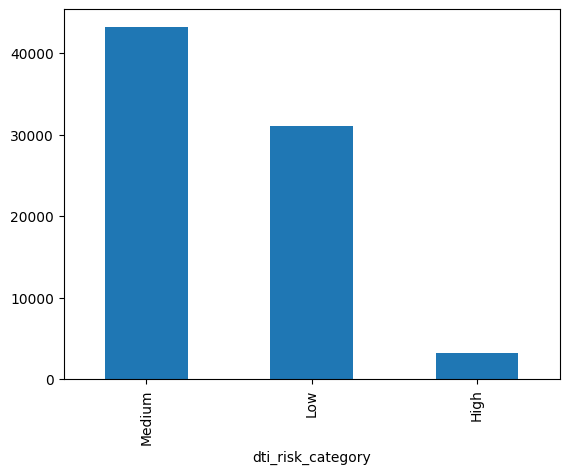

In [13]:
genderDist = df['dti_risk_category'].value_counts()
print ('Frequency Table for DTI Category')
print(genderDist)
genderDist.plot(kind='bar')


# Outliers
No outliers are removed because the maximum value for each column is valid to have that value in the column

In [14]:
df['borrower_income'].describe()

,borrower_income
count,77536.000000
mean,49221.949804
std,8371.635077
min,30000.000000
25%,44800.000000
50%,48100.000000
75%,51400.000000
max,105200.000000


In [15]:
df['total_debt'].describe()

,total_debt
count,77536.000000
mean,19221.949804
std,8371.635077
min,0.000000
25%,14800.000000
50%,18100.000000
75%,21400.000000
max,75200.000000


# Data Balancing

crearly the data is immbalanced

In [16]:
class_counts= df['loan_status'].value_counts()
class_counts

,count
loan_status,
0,75036
1,2500


<Axes: ylabel='count'>

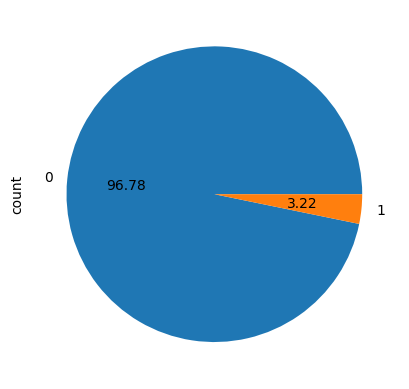

In [17]:
# Split data into features (X) and target (y)
X = df.drop(columns=['loan_status','dti_risk_category'])
y = df['loan_status']

y.value_counts().plot.pie(autopct='%.2f')

Frequency Table for Class distribution
loan_status
1     2500
0    75036
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

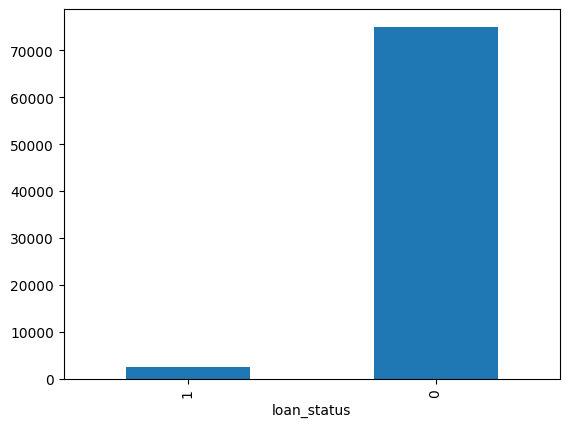

In [18]:
# change position
classDist = df['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')


#Using SMOTE technic

In [19]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # ensures that the class distribution in the training and testing sets matches the original dataset.

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
loan_status
0    52525
1    52525
Name: count, dtype: int64


# Now you can proceed to train a model using X_train_smote and y_train_smote

<Axes: ylabel='count'>

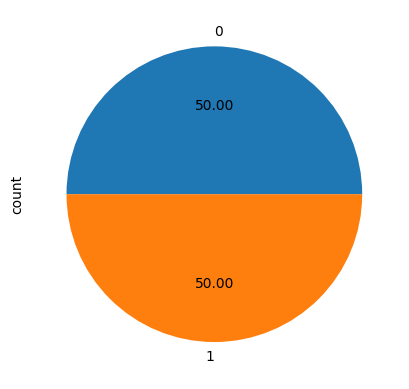

In [20]:
y_train_smote.value_counts().plot.pie(autopct='%.2f')

<Axes: title={'center': 'Bar Chart with Percentages'}, xlabel='loan_status'>

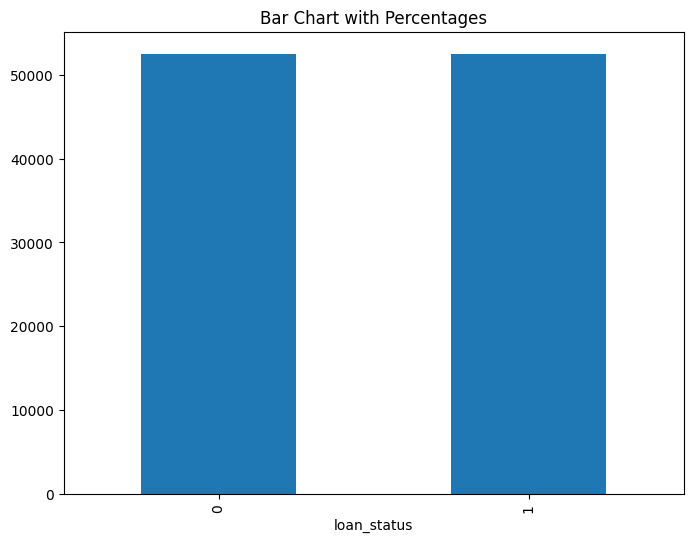

In [21]:
#y_train_smote.value_counts().plot(kind='bar', autopct='%.2f')
y_train_smote.value_counts().plot(kind='bar',
                                  figsize=(8, 6),
                                  title='Bar Chart with Percentages')

In [22]:
# Plot the class distribution in the balanced data
#y_train_smote.value_counts().plot(kind='bar', color=['blue', 'orange'])
#plt.title('Class Distribution After SMOTE')
#plt.xlabel('Loan Status')
#plt.ylabel('Count')
#plt.xticks(ticks=[0, 1], labels=['Class 0 (Non-default)', 'Class 1 (Default)'], rotation=0)
#plt.show()


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the resampled data (SMOTE)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9945402175314905
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     22511
           1       0.86      1.00      0.92       750

    accuracy                           0.99     23261
   macro avg       0.93      1.00      0.96     23261
weighted avg       1.00      0.99      0.99     23261

Confusion Matrix:
 [[22385   126]
 [    1   749]]


# Decision Tree

Decision Tree Classifier Accuracy: 0.9916

Confusion Matrix:
[[22411   100]
 [   96   654]]


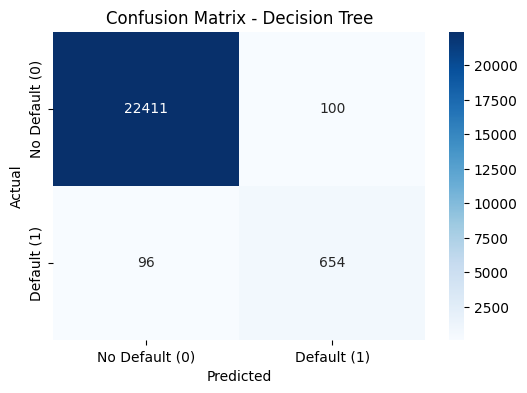


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.87      0.87       750

    accuracy                           0.99     23261
   macro avg       0.93      0.93      0.93     23261
weighted avg       0.99      0.99      0.99     23261



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import matplotlib.pyplot as plt
#import seaborn as sns

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model on the balanced training data
dt_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# Generate and print the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default (0)', 'Default (1)'], yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(class_report_dt)

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data_cleaned' is the processed DataFrame
#X = data_cleaned.drop('loan_status', axis=1)
#y = data_cleaned['loan_status']

# Normalize continuous features
continuous_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'total_debt']
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Initialize the Random Forest model
mod_forest = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)

# Fit the model to the training data
mod_forest.fit(X, y)

# Make predictions on the training data
predictions = pd.DataFrame({
    'loan_status_rf_pred_class': mod_forest.predict(X)
})

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions['loan_status_rf_pred_class'])
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy calculation
accuracy = accuracy_score(y, predictions['loan_status_rf_pred_class'])
print(f"Accuracy: {accuracy: }")

# Classification report
class_report = classification_report(y, predictions['loan_status_rf_pred_class'])
print("Classification Report:")
print(class_report)

# Feature importance extraction
feature_importances = pd.DataFrame({
    'variable': X.columns,
    'MeanDecreaseGini': mod_forest.feature_importances_
}).sort_values(by='MeanDecreaseGini', ascending=False)

print("Feature Importances:")
print(feature_importances)

Confusion Matrix:
[[74842   194]
 [   44  2456]]
Accuracy:  0.9969304581097813
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75036
           1       0.93      0.98      0.95      2500

    accuracy                           1.00     77536
   macro avg       0.96      0.99      0.98     77536
weighted avg       1.00      1.00      1.00     77536

Feature Importances:
           variable  MeanDecreaseGini
1     interest_rate          0.384443
2   borrower_income          0.185808
0         loan_size          0.155300
6        total_debt          0.132721
3    debt_to_income          0.132200
4   num_of_accounts          0.009441
5  derogatory_marks          0.000087


# KNN

KNN Accuracy: 0.9948841408365935
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     22511
           1       0.86      1.00      0.93       750

    accuracy                           0.99     23261
   macro avg       0.93      1.00      0.96     23261
weighted avg       1.00      0.99      1.00     23261

KNN Confusion Matrix:
 [[22393   118]
 [    1   749]]


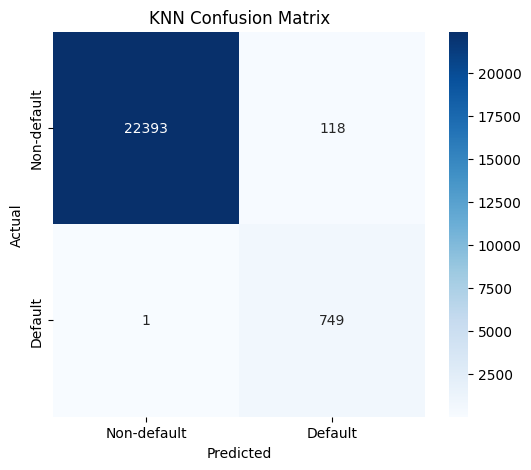

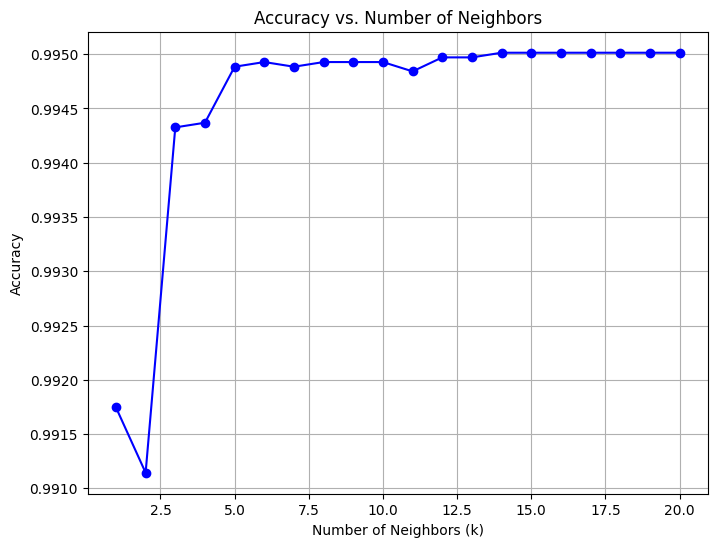

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors as needed
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot accuracy vs. number of neighbors
accuracies = []
neighbors = range(1, 21)  # Test n_neighbors from 1 to 20
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o', color='b')
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

#Accuracy Analysis

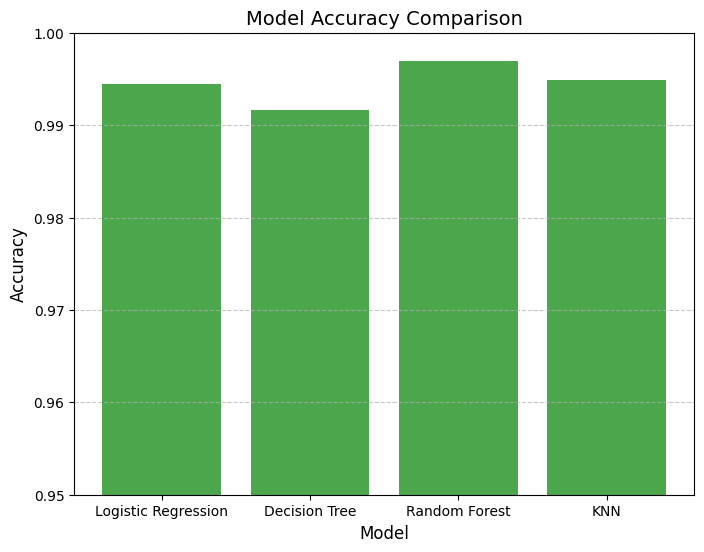

In [27]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Model accuracy values
model_accuracies = {
    "Logistic Regression": 0.9945,
    "Decision Tree": 0.9916,  # Replace with actual accuracy if available
    "Random Forest": 0.9969,
    # Replace with actual accuracy if available
    "KNN":0.9949
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], alpha=0.7, color="green")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.95, 1)  # Setting limits to emphasize differences
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
